##Medical Insurance Cost with Linear Regression

###About the data:

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
insurance= pd.read_csv('/content/drive/MyDrive/data/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
#checking for duplicates
insurance.loc[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#dropping duplicate
insurance.drop_duplicates(inplace=True)

In [ ]:
insurance.loc[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges


## **Exploratory Data Analysis**

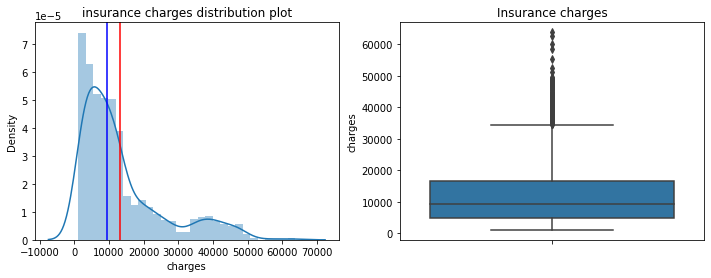

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(insurance.charges)
plt.title('insurance charges distribution plot')
plt.axvline(insurance.charges.mean(), color="r")
plt.axvline(insurance.charges.median(), color="b")

plt.subplot(1,2,2)
plt.title('Insurance charges')
sns.boxplot(y=insurance.charges)

plt.show()

In [ ]:
insurance.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [ ]:
print("Difference between mean and median: ",insurance.charges.mean()-insurance.charges.median())

Difference between mean and median:  3892.960186655948


##Inference:

1) We can see that the above plot is not normally distributed and it is right skewed.

2) Most values fall between 4746 to 16657.

3) There is a significant difference between the mean and the median of the charges distribution.

4) The data points are far spread out from the mean, which indicates a high variance in the insurance charges.(85% of the prices are below 24,990 , whereas the remaining 15% are between 24,990 and 63,770.)

[]

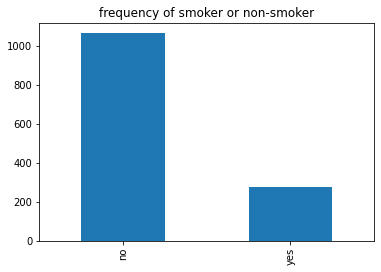

In [ ]:
insurance.smoker.value_counts().plot(kind='bar')
plt.title("frequency of smoker or non-smoker")
plt.plot(xlabel='smokers',ylabel='frequency')

(array([221., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

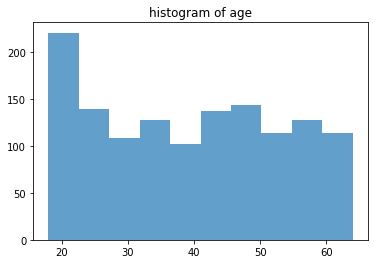

In [ ]:
plt.title('histogram of age')
plt.hist(insurance['age'], bins=10, alpha=0.7)

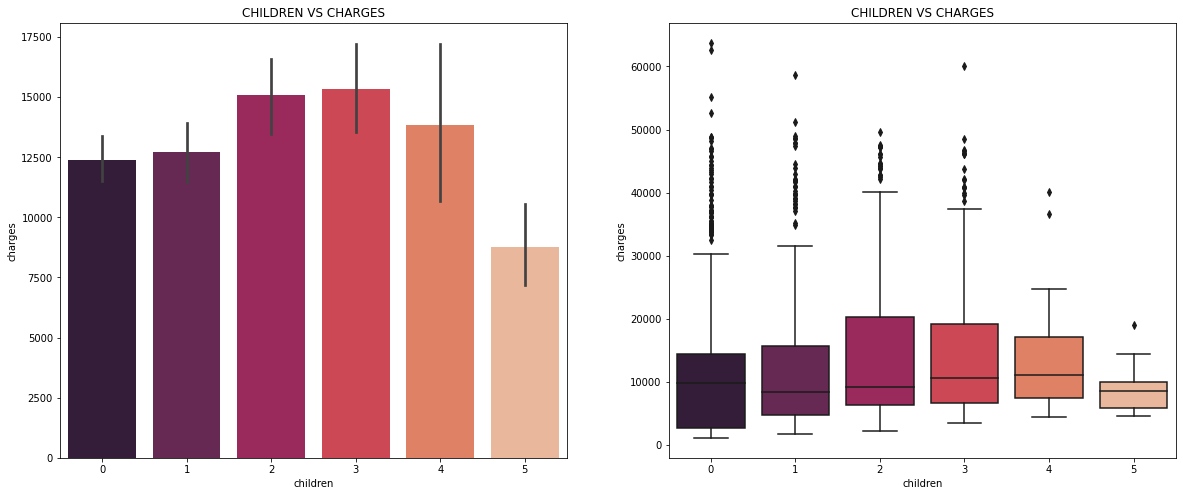

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('CHILDREN VS CHARGES')
ax = sns.barplot(x='children', y='charges', data=insurance, palette='rocket')

plt.subplot(1,2,2)
plt.title('CHILDREN VS CHARGES')
sns.boxplot(x=insurance.children, y=insurance.charges, palette=("rocket"))

plt.show()

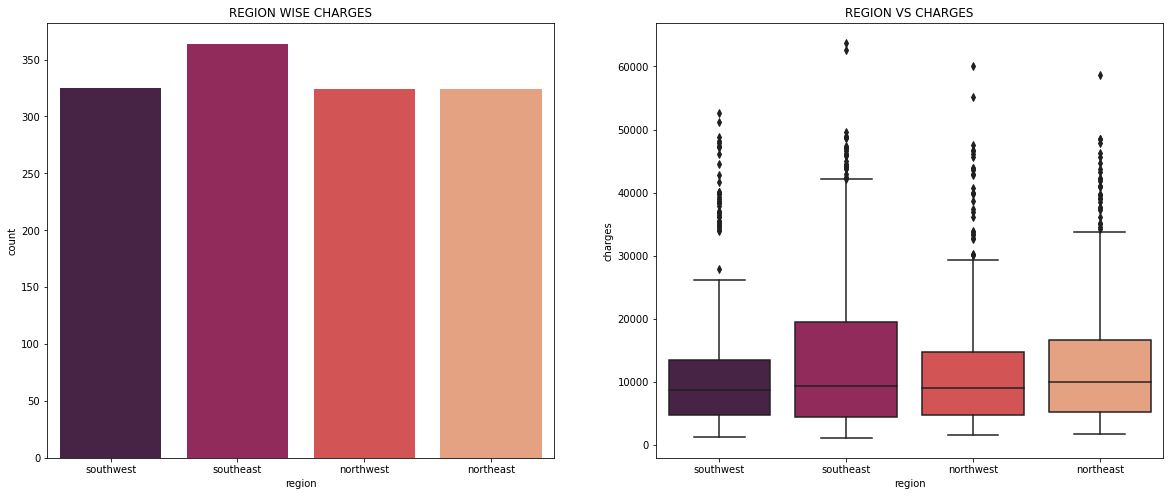

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('REGION WISE CHARGES')
sns.countplot(insurance.region, palette=("rocket"))

plt.subplot(1,2,2)
plt.title('REGION VS CHARGES')
sns.boxplot(x=insurance.region, y=insurance.charges, palette=("rocket"))

plt.show()

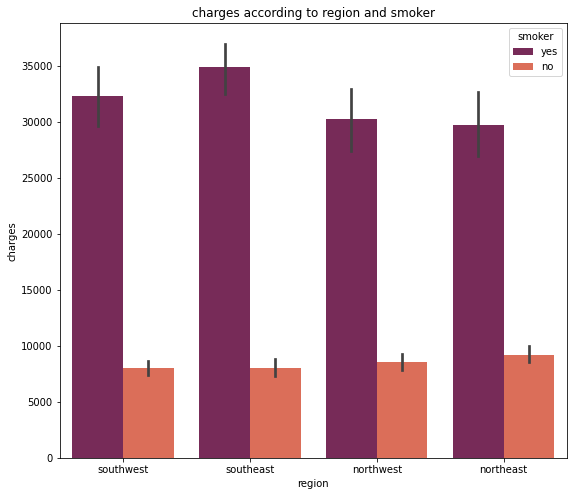

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('charges according to region and smoker')
ax = sns.barplot(x='region', y='charges',hue='smoker', data=insurance, palette='rocket')

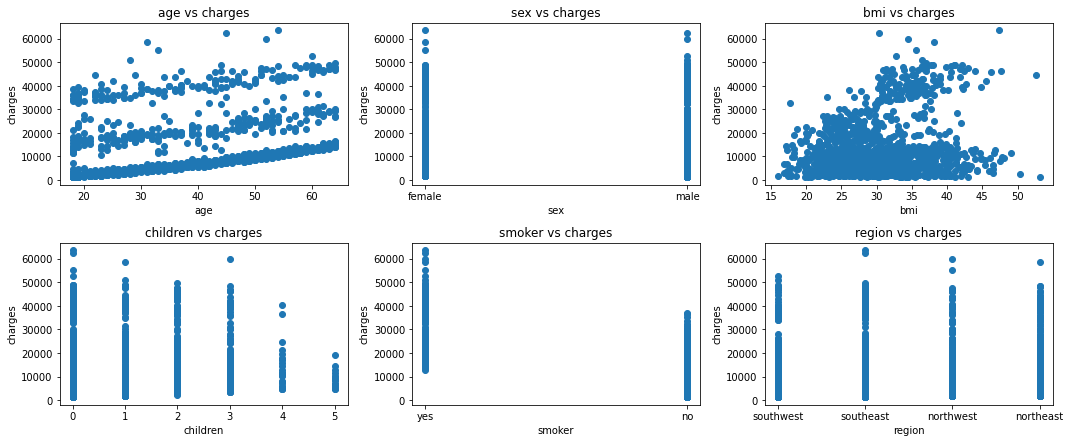

In [ ]:
def scatter(x,fig):
    plt.subplot(5,3,fig)
    plt.scatter(insurance[x],insurance['charges'])
    plt.title(x+' vs charges')
    plt.ylabel('charges')
    plt.xlabel(x)

plt.figure(figsize=(15,15))

scatter('age', 1)
scatter('sex', 2)
scatter('bmi', 3)
scatter('children', 4)
scatter('smoker', 5)
scatter('region',6)

plt.tight_layout()

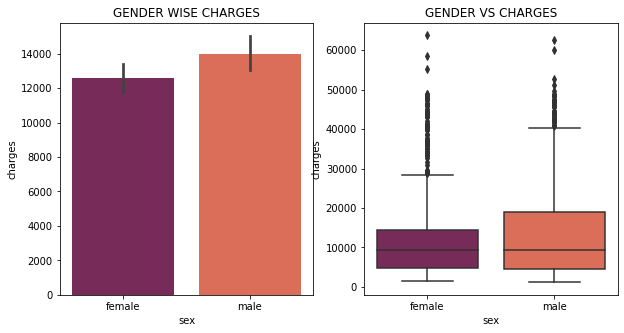

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('GENDER WISE CHARGES')
ax = sns.barplot(x='sex', y='charges', data=insurance, palette='rocket')

plt.subplot(1,2,2)
plt.title('GENDER VS CHARGES')
sns.boxplot(x=insurance.sex, y=insurance.charges, palette=("rocket"))

plt.show()

##DATA PREPARATION


In [ ]:
cat_cols = list(insurance.select_dtypes(["object",'category']).columns)
cat_cols

['sex', 'smoker', 'region']

In [ ]:
#one hot encoding
df=pd.get_dummies(insurance, columns=cat_cols, drop_first=True)

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


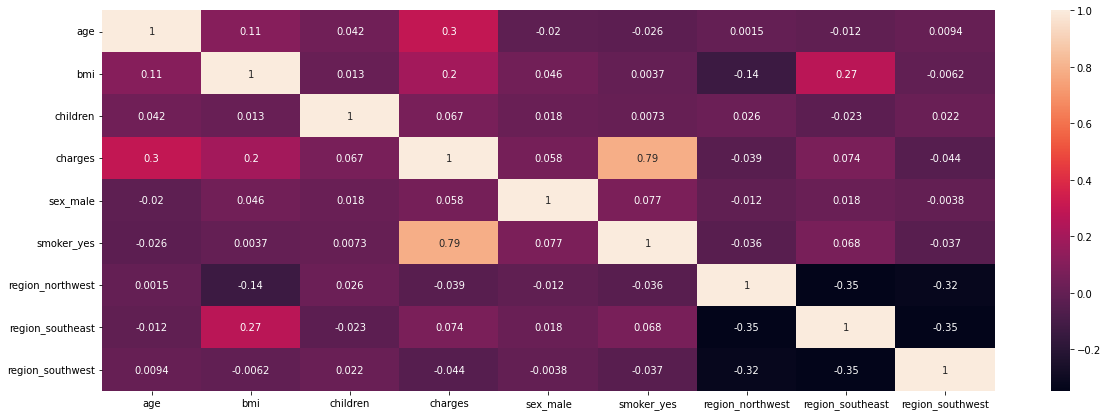

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (20, 7))
sns.heatmap(df.corr(), annot = True, cmap="rocket")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['charges'], axis=1)
y=df['charges']
np.random.seed(0)
X_train,X_test,Y_train,Y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['age','bmi']
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,0.108696,0.496099,0,1,0,0,0,1
306,0.217391,0.310465,2,0,0,0,0,1
318,0.565217,0.314366,0,0,0,1,0,0
816,0.130435,0.222357,0,0,0,1,0,0
157,0.000000,0.247915,0,1,1,0,0,0


In [ ]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

##Linear Regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_train)

In [ ]:
lr.score(X_train,Y_train)

0.746755771608647

In [ ]:
r2=r2_score(Y_train,Y_pred)
n=X_train.shape[0]
p = X_train.shape[1]
num = (1-r2)*(n-1)
den = n-p-1
ar2_train = 1 - (num/den)
ar2_train

0.7445679165037542

##RFE

In [ ]:
from sklearn.feature_selection import RFE
fe=RFE(estimator=LinearRegression(), n_features_to_select=3, step=1)
fe.fit(X_train,Y_train)
fe.score(X_test,Y_test)

0.75783003115855

In [ ]:
X_test.iloc[:,fe.support_].columns

Index(['age', 'bmi', 'smoker_yes'], dtype='object')

##RFECV

In [ ]:
from sklearn.feature_selection import RFECV
fea=RFECV(estimator=LinearRegression(), min_features_to_select=1, step=1, n_jobs=-1, scoring="r2", cv=2)
fea.fit(X_train,Y_train)
fea.score(X_test,Y_test)

0.7574730380819561

In [ ]:
print(X_train.iloc[:,fea.support_].columns)

Index(['age', 'bmi', 'children', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [ ]:
X_train.iloc[:,fea.support_].columns

Index(['age', 'bmi', 'children', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
X_train.iloc[fea.ranking_].columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

##OLS


In [ ]:
import statsmodels.api as sm
def build_model(x,y):
    x = sm.add_constant(x)  
    lm = sm.OLS(y,x).fit()                   
    print(lm.summary()) 
    return x

lr_ols=build_model(X_train,Y_train)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     341.3
Date:                Wed, 25 May 2022   Prob (F-statistic):          4.83e-270
Time:                        02:07:04   Log-Likelihood:                -9495.5
No. Observations:                 935   AIC:                         1.901e+04
Df Residuals:                     926   BIC:                         1.905e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1507.6282    717.352  

In [ ]:
#RFE OLS
from sklearn.feature_selection import RFE
fe=RFE(estimator=LinearRegression(), n_features_to_select=3, step=1)
fe.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [ ]:
xtrain_rfe = X_train.iloc[ :, fe.support_]
xtest_rfe = X_test.loc[ :, fe.support_]

In [ ]:
lr_ols=build_model(xtest_rfe,Y_test)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     429.3
Date:                Wed, 25 May 2022   Prob (F-statistic):          2.41e-124
Time:                        02:07:04   Log-Likelihood:                -4037.3
No. Observations:                 402   AIC:                             8083.
Df Residuals:                     398   BIC:                             8099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2724.8995    838.745     -3.249      0.0

In [ ]:
#Rfecv ols
from sklearn.feature_selection import RFECV
fea=RFECV(estimator=LinearRegression(), min_features_to_select=1, step=1, n_jobs=-1, scoring="r2", cv=5)
fea.fit(X_train,Y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1, scoring='r2')

In [ ]:
xtrain_rfecv = X_train.iloc[ :, fea.support_]
xtest_rfecv = X_test.loc[ :, fea.support_]

In [ ]:
lr_ols=build_model(xtest_rfecv,Y_test)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 25 May 2022   Prob (F-statistic):          9.53e-123
Time:                        02:07:04   Log-Likelihood:                -4031.9
No. Observations:                 402   AIC:                             8078.
Df Residuals:                     395   BIC:                             8106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3126.7805    884.531  

##Residual Analysis of Model

Text(0.5, 0, 'Errors')

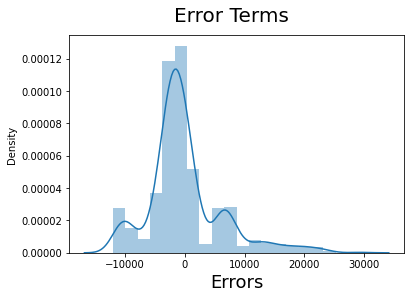

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)         # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.